In [1]:
from src.topic_model import TopicModelPipeline
from src.preprocessor import Preprocessor
from src.plots import Plots

c:\Users\steng\anaconda3\envs\language_processing\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# def new_clean_text_columns(self):
#     """
#     Method to overwrite clean_text_columns method from Preprocessor.
#     """
#     self.df[self.text_column] = "Example"


# Preprocessor.clean_text_columns = new_clean_text_columns

In [3]:
model = TopicModelPipeline(
    project_name="Kaggle_Sentiment_Data",
    output_path=r"C:\Users\steng\Github\topic-modeling-pipeline\data\Output",
    documents_path=r"C:\Users\steng\Github\topic-modeling-pipeline\data\Input",
    file_path=r"C:\Users\steng\Github\topic-modeling-pipeline\data\Output\Kaggle_Sentiment_Data_2023-10-20_21-11\Kaggle_Sentiment_Data_merged_dataframe.parquet",
    file_type="parquet",
    text_column="text",
    time_column="date",
    time_format="%a %b %d %H:%M:%S %Z %Y",
    clean_text=False,
    sample=True,
    sample_frequency="weekly",
    tresh_absolut=150,
    min_cluster_size=10,
    n_neighbors=5,
    vocab_frequency=0,
    top_n_words=50,
)

Folder 'Kaggle_Sentiment_Data_2023-10-23_14-12' created!
Loading, merging and cleaning files...
Sampling the data....


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steng\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving sampled dataframe with the name: Kaggle_Sentiment_Data_merged_dataframe.parquet.
Tokenizing words and filtering for less used ones...


100%|██████████| 1800/1800 [00:00<00:00, 138466.50it/s]

Generating sentence level embeddings using all-MiniLM-L6-v2...



Batches: 100%|██████████| 57/57 [00:01<00:00, 41.33it/s]


Reducing embedding dimensionality to 5D...
UMAP(angular_rp_forest=True, metric='cosine', n_components=5, n_neighbors=5, random_state=42, verbose=True)
Mon Oct 23 14:12:44 2023 Construct fuzzy simplicial set
Mon Oct 23 14:12:47 2023 Finding Nearest Neighbors
Mon Oct 23 14:12:49 2023 Finished Nearest Neighbor Search
Mon Oct 23 14:12:51 2023 Construct embedding


Epochs completed:  14%| █▍         71/500 [00:01]

	completed  0  /  500 epochs
	completed  50  /  500 epochs


Epochs completed:  28%| ██▊        140/500 [00:01]

	completed  100  /  500 epochs
	completed  150  /  500 epochs


Epochs completed:  55%| █████▌     277/500 [00:01]

	completed  200  /  500 epochs
	completed  250  /  500 epochs


Epochs completed:  76%| ███████▌   380/500 [00:02]

	completed  300  /  500 epochs
	completed  350  /  500 epochs


Epochs completed:  90%| ████████▉  449/500 [00:02]

	completed  400  /  500 epochs
	completed  450  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [00:02]


Mon Oct 23 14:12:54 2023 Finished embedding
Performing clustering on embeddings...
Metric Name                   | Value
--------------------------------------
silhouette_score               | -0.0849
davies_bouldin_score           | 1.1849
calinski_harabasz_score        | 147.9223
--------------------------------------
Reducing embedding dimensionality to 2D...
UMAP(angular_rp_forest=True, metric='cosine', n_neighbors=5, random_state=42, verbose=True)
Mon Oct 23 14:12:54 2023 Construct fuzzy simplicial set
Mon Oct 23 14:12:56 2023 Finding Nearest Neighbors
Mon Oct 23 14:12:56 2023 Finished Nearest Neighbor Search
Mon Oct 23 14:12:56 2023 Construct embedding


Epochs completed:   8%| ▊          41/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs


Epochs completed:  31%| ███        156/500 [00:01]

	completed  100  /  500 epochs
	completed  150  /  500 epochs


Epochs completed:  62%| ██████▏    311/500 [00:01]

	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs


Epochs completed:  85%| ████████▌  427/500 [00:01]

	completed  350  /  500 epochs
	completed  400  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [00:01]
2023-10-23 14:12:58,569 - BERTopic - The dimensionality reduction algorithm did not contain the `y` parameter and therefore the `y` parameter was not used
2023-10-23 14:12:58,570 - BERTopic - Reduced dimensionality
2023-10-23 14:12:58,572 - BERTopic - Clustered reduced embeddings


	completed  450  /  500 epochs
Mon Oct 23 14:12:58 2023 Finished embedding
Fitting the BERTopic model.


c:\Users\steng\anaconda3\envs\language_processing\lib\site-packages\bertopic\vectorizers\_ctfidf.py:69: RuntimeWarning: divide by zero encountered in divide
  idf = np.log((avg_nr_samples / df)+1)


In [4]:
topics = model.topic_model.get_topic_info()
topics

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1106,-1_morning_day_happy_today,"[morning, day, happy, today, birthday, tomorro...",[@crazy_ettenna Hey sis happy birthday i hope ...
1,0,184,0_slept_nap_sleep_bed,"[slept, nap, sleep, bed, morning, insomnia, wa...",[I'm gunna go 2 bed yup its been a long day &a...
2,1,173,1_janie2305_mail_thanks_hey,"[janie2305, mail, thanks, hey, mrtweet, thank,...",[@jrkgirlnla @paomiami - Thanks guys - u are a...
3,2,73,2_raining_weather_rain_rained,"[raining, weather, rain, rained, rainy, monsoo...","[I really hate this weather yesterday, so nic..."
4,3,67,3_sick_flu_coughing_cold,"[sick, flu, coughing, cold, feeling, feel, sor...","[I think I'm sick , i feel like im sick...damn..."
5,4,46,4_pizza_hungry_garlic_cooking,"[pizza, hungry, garlic, cooking, cooked, sandw...",[Air fresheners that are supposed to smell lik...
6,5,36,5_iphone_phone_blackberry_broke,"[iphone, phone, blackberry, broke, laptop, ipo...",[NOOOOO! My charger is broken! I can't charge...
7,6,35,6_tweet_twitter_retweet_tweeting,"[tweet, twitter, retweet, tweeting, tweets, tw...",[@dannykurily okay. I feel kind of bad after m...
8,7,33,7_hollyoaks_celebs_kate_lost,"[hollyoaks, celebs, kate, lost, channel, jon, ...",[I object to channel surfing &amp; finding ful...
9,8,32,8_mothers_mother_mom_moms,"[mothers, mother, mom, moms, mommy, day, grand...",[HAPPY MOTHER'S DAY TO ALL MOTHERS OUT THERE!!...


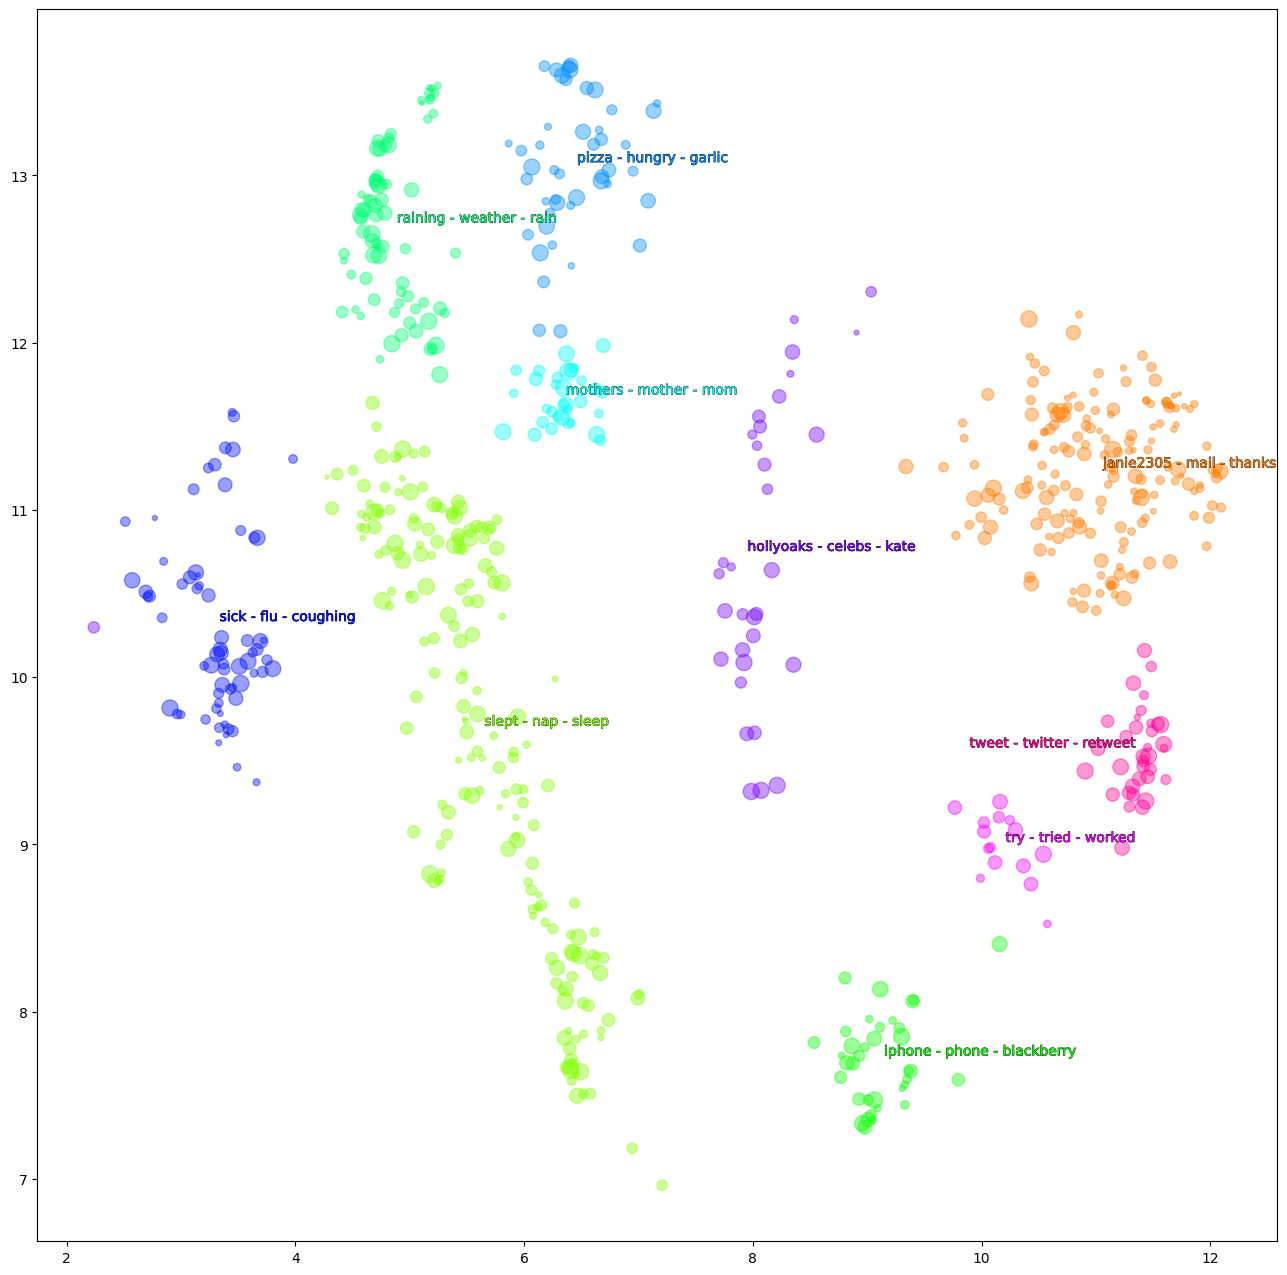

In [5]:
model.plot_top_clusters()

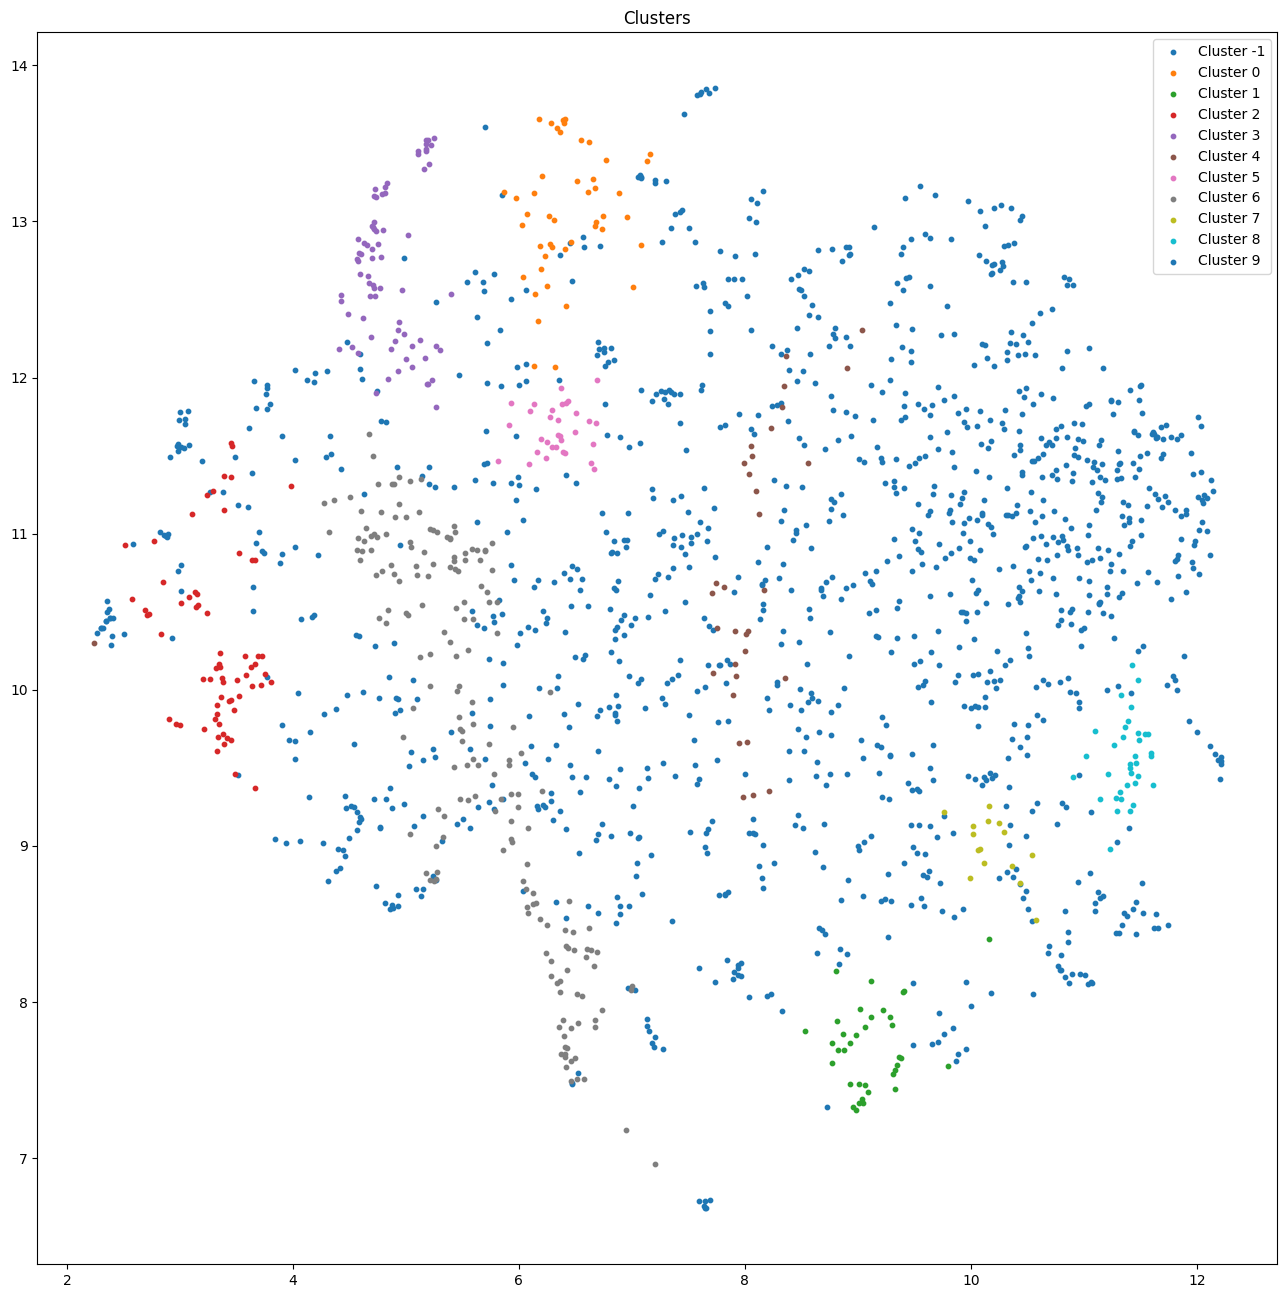

In [6]:
model.plot_raw_clusters()

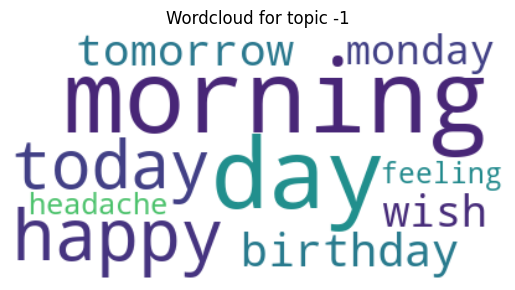

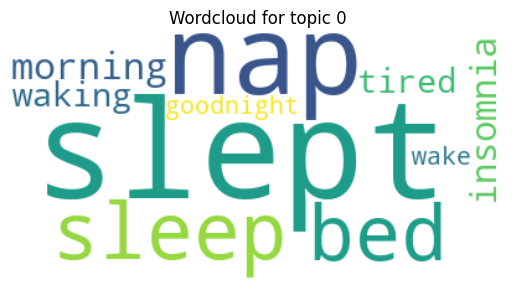

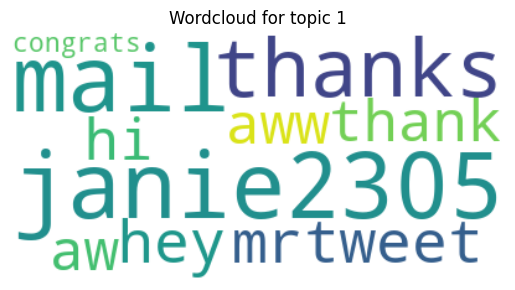

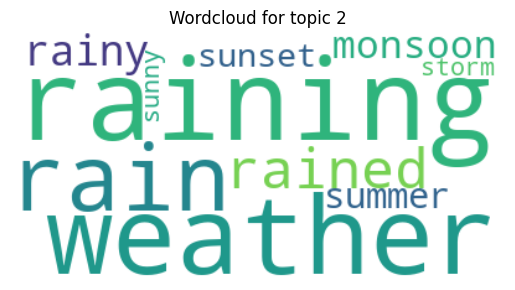

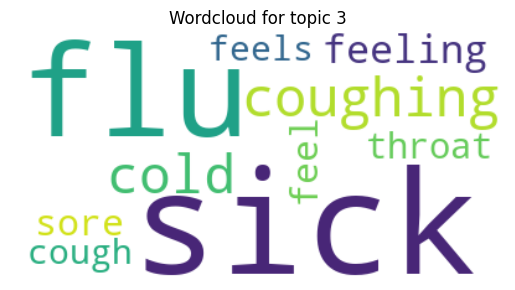

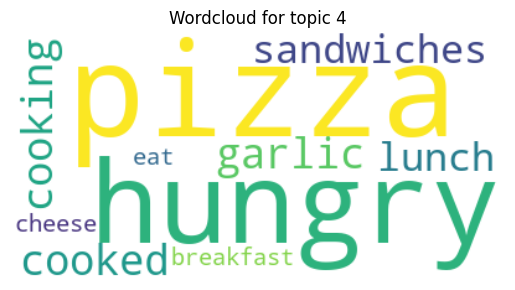

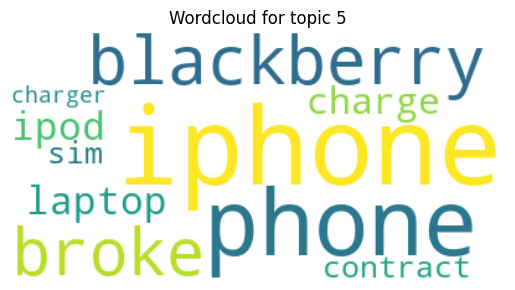

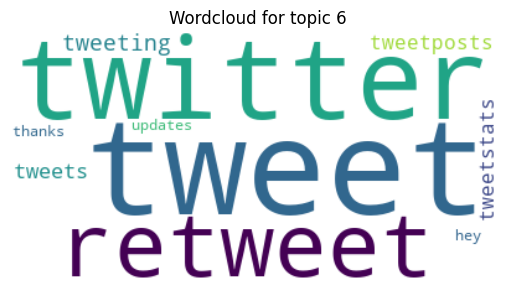

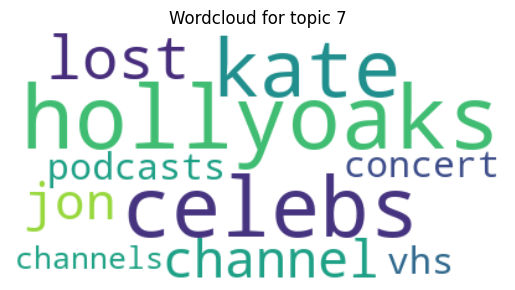

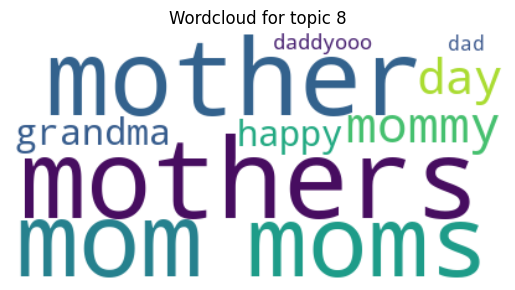

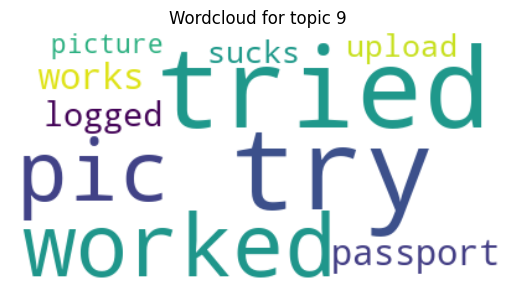

In [7]:
model.plot_wordclouds()